<a href="https://colab.research.google.com/github/AnshukAgina1/Task-7-Support-Vector-Machine/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:

df = df.drop(columns=['id','Unnamed: 32'], errors='ignore')


X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'M':1, 'B':0})



In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Linear SVM Accuracy: 0.956140350877193

Classification Report (Linear SVM):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



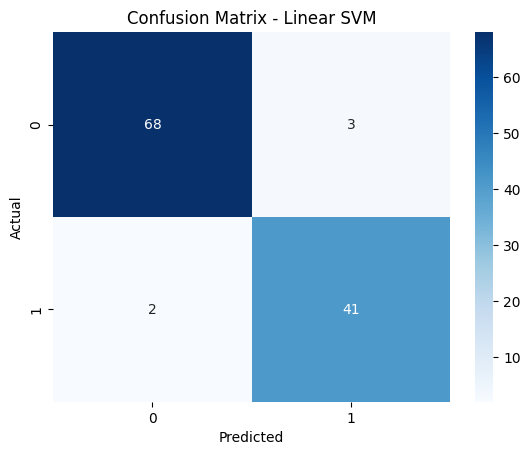

In [18]:

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_lin = svm_linear.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_lin))
print("\nClassification Report (Linear SVM):\n", classification_report(y_test, y_pred_lin))

cm_lin = confusion_matrix(y_test, y_pred_lin)
sns.heatmap(cm_lin, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



RBF SVM Accuracy: 0.9649122807017544

Classification Report (RBF SVM):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



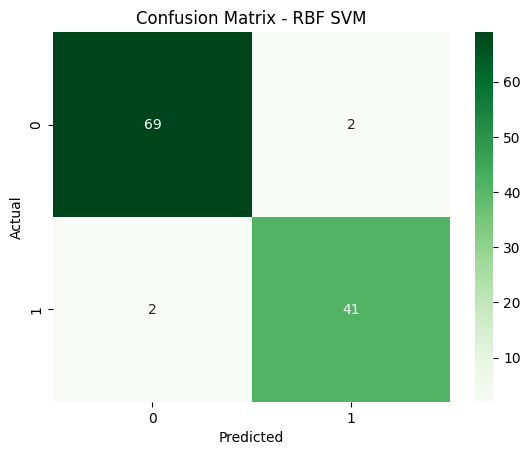

In [19]:

svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF SVM):\n", classification_report(y_test, y_pred_rbf))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [20]:

param_grid = {
    'C':[0.1,1,10],
    'gamma':[0.01,0.1,1],
    'kernel':['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearch:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters from GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Model Accuracy: 0.9824561403508771


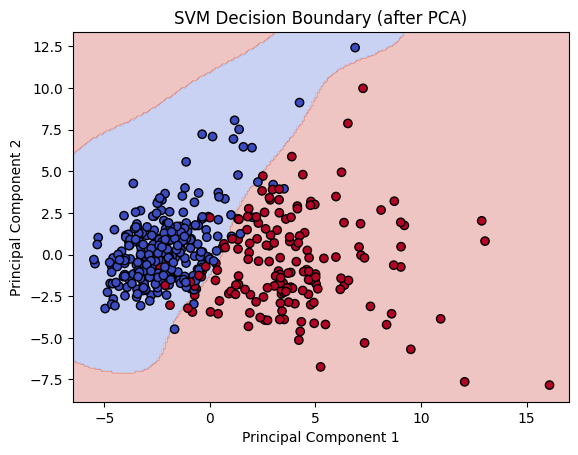

In [21]:

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_vis = SVC(kernel='rbf', C=1, gamma=0.1)
svm_vis.fit(X_train_pca, y_train)


x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor="k", cmap="coolwarm")
plt.title("SVM Decision Boundary (after PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
